<a href="https://colab.research.google.com/github/vaibhav688/vaibhav-7/blob/main/TOBACCO_MORTALITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tobacco Mortality Analysis & Forecast**


**Submitted by: Vaibhav Vaidyanathan**

**INTERNSHIP DOMAIN:DATASCIENCE**

**Duration: OCT 15-JAN15**


**1. Introduction**

Tobacco usage contributes to a significant percentage of annual preventable deaths across the world. Understanding how mortality rates change over time and how they correlate with factors like economic affordability and smoking behavior is important for health policymakers.
This project aims to build a data-driven analytical model to understand patterns in historical tobacco-related mortality and to forecast future mortality risks using predictive modeling techniques.

**2. Objectives**

To merge and analyze tobacco-related datasets.

To perform exploratory data analysis and interpret mortality trends.

To engineer a Mortality Risk Index using correlation-weighted feature scaling.

To develop machine learning models to predict tobacco-attributable deaths.

To forecast future mortality risk using ARIMA time-series model.

To derive insights to support decision-making and public health strategies.

**Tools and Technologies Used**

| Category      | Tools                       |
| ------------- | --------------------------- |
| Programming   | Python                      |
| Visualization | Matplotlib, Seaborn, Plotly |
| ML Frameworks | Scikit-learn                |
| Time-Series   | Statsmodels (ARIMA)         |
| Platform      | Google Colab                |


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import pandas as pd
data1=pd.read_csv("/content/admissions.csv")

**3. Dataset Description**

This project uses three datasets:

| Dataset        | Description                               | Key Columns                      |
| -------------- | ----------------------------------------- | -------------------------------- |
| admissions.csv | Tobacco-related hospital admissions       | Year, Smoking Prevalence         |
| fatalities.csv | Annual deaths attributed to tobacco usage | Attributable_Deaths              |
| metrics.csv    | Economic indicators of tobacco products   | Affordability Index, Price Index |


Merged Dataset Fields

Year

Smoking_Prevalence_16Plus_Percent

Attributable_Deaths

Affordability_of_Tobacco_Index

Tobacco_Price_Index

These datasets were merged into a unified dataframe using the Year column as the primary key.

In [ ]:
data1

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014/15,All codes,All admissions,All admissions,Number of admissions,NaN,11011882
1,2014/15,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,NaN,1713330
2,2014/15,C00-D48,All cancers,All cancers,Number of admissions,NaN,1691035
3,2014/15,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,NaN,611002
4,2014/15,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,NaN,907157
...,...,...,...,...,...,...,...
2074,2004/05,K50,Crohns Disease,Digestive diseases which can be caused caused ...,Attributable number,Female,1400
2075,2004/05,K05,Periodontal Disease / Periodonitis,Digestive diseases which can be caused caused ...,Attributable number,Female,700
2076,2004/05,H25,Age Related Cataract 45+,Other diseases which can be caused by smoking,Attributable number,Female,8900
2077,2004/05,S72.0-S72.2,Hip Fracture 55+,Other diseases which can be caused by smoking,Attributable number,Female,4900


In [ ]:
data2=pd.read_csv("/content/fatalities.csv")

In [ ]:
data2

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014,All codes,All deaths,All deaths,Number of observed deaths,NaN,459087
1,2014,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All deaths which can be caused by smoking,All deaths which can be caused by smoking,Number of observed deaths,NaN,235820
2,2014,C00-D48,All cancers,All cancers,Number of observed deaths,NaN,136312
3,2014,J00-J99,All respiratory diseases,All respiratory diseases,Number of observed deaths,NaN,61744
4,2014,I00-I99,All circulatory diseases,All circulatory diseases,Number of observed deaths,NaN,126101
...,...,...,...,...,...,...,...
1744,2004,I72-I78,Other arterial disease,Circulatory diseases which can be caused by sm...,Attributable number,Female,400
1745,2004,I60-I69,Cerebrovascular Disease,Circulatory diseases which can be caused by sm...,Attributable number,Female,1900
1746,2004,I71,Aortic Aneurysm,Circulatory diseases which can be caused by sm...,Attributable number,Female,1900
1747,2004,I70,Atherosclerosis,Circulatory diseases which can be caused by sm...,Attributable number,Female,100


In [ ]:
data3=pd.read_csv("/content/metrics.csv")
data3

,Year,Tobacco Price\nIndex,Retail Prices\nIndex,Tobacco Price Index Relative to Retail Price Index,Real Households' Disposable Income,Affordability of Tobacco Index,Household Expenditure on Tobacco,Household Expenditure Total,Expenditure on Tobacco as a Percentage of Expenditure
0,2015,1294.3,386.7,334.7,196.4,58.7,19252.0,1152387.0,1.7
1,2014,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7
2,2013,1139.3,374.2,304.5,190.3,62.5,18683.0,1073106.0,1.7
3,2012,1057.8,363.1,291.3,192.9,66.2,18702.0,1029378.0,1.8
4,2011,974.9,351.9,277.1,189.3,68.3,18217.0,990828.0,1.8
5,2010,878.3,334.5,262.6,195.0,74.3,17176.0,954781.0,1.8
6,2009,815.9,319.7,255.2,195.7,76.7,16209.0,911665.0,1.8
7,2008,784.7,321.3,244.2,192.5,78.8,15879.0,928265.0,1.7
8,2007,751.5,309.1,243.1,195.9,80.6,15766.0,898478.0,1.8
9,2006,713.7,296.4,240.8,192.3,79.9,15542.0,851456.0,1.8


In [ ]:
data4=pd.read_csv("/content/prescriptions.csv")

In [ ]:
data4

,Year,All Pharmacotherapy Prescriptions,Nicotine Replacement Therapy (NRT) Prescriptions,Bupropion (Zyban) Prescriptions,Varenicline (Champix) Prescriptions,Net Ingredient Cost of All Pharmacotherapies,Net Ingredient Cost of Nicotine Replacement Therapies (NRT),Net Ingredient Cost of Bupropion (Zyban),Net Ingredient Cost of Varenicline (Champix)
0,2014/15,1348,766,21,561.0,38145,18208,807,19129.0
1,2013/14,1778,1059,22,697.0,48767,24257,865,23646.0
2,2012/13,2203,1318,26,859.0,58121,28069,994,29058.0
3,2011/12,2532,1545,30,957.0,64552,30951,1216,32385.0
4,2010/11,2564,1541,36,987.0,65883,30808,1581,33494.0
5,2009/10,2483,1559,47,877.0,63425,31429,2060,29936.0
6,2008/09,2263,1492,58,714.0,57520,30683,2143,24694.0
7,2007/08,2475,1756,107,612.0,61479,35883,3882,21714.0
8,2006/07,2079,1938,119,22.0,44817,39743,4315,760.0
9,2005/06,2205,2076,129,NaN,48092,43465,4627,NaN


In [ ]:
data5=pd.read_csv("/content/smokers.csv")
data5

,Year,Method,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over
0,1974,Unweighted,NaN,46,44,51,52,50,33
1,1976,Unweighted,NaN,42,42,45,48,48,30
2,1978,Unweighted,NaN,40,39,45,45,45,30
3,1980,Unweighted,NaN,39,37,46,44,45,29
4,1982,Unweighted,NaN,35,35,38,39,41,27
...,...,...,...,...,...,...,...,...,...
79,2010,Weighted,Female,20,24,25,23,20,13
80,2011,Weighted,Female,19,24,21,23,18,12
81,2012,Weighted,Female,19,23,23,21,19,12
82,2013,Weighted,Female,17,20,20,20,19,10


In [ ]:
data5

,Year,Method,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over
0,1974,Unweighted,NaN,46,44,51,52,50,33
1,1976,Unweighted,NaN,42,42,45,48,48,30
2,1978,Unweighted,NaN,40,39,45,45,45,30
3,1980,Unweighted,NaN,39,37,46,44,45,29
4,1982,Unweighted,NaN,35,35,38,39,41,27
...,...,...,...,...,...,...,...,...,...
79,2010,Weighted,Female,20,24,25,23,20,13
80,2011,Weighted,Female,19,24,21,23,18,12
81,2012,Weighted,Female,19,23,23,21,19,12
82,2013,Weighted,Female,17,20,20,20,19,10


In [ ]:
import pandas as pd

# 1. Load Data
df_smokers = pd.read_csv("/content/smokers.csv")
df_fatalities = pd.read_csv("/content/fatalities.csv")
df_metrics = pd.read_csv("/content/metrics.csv")
df_prescriptions = pd.read_csv("/content/prescriptions.csv")

# --- 2. Prepare Smokers Data (Prevalence) ---
# Filter for overall weighted prevalence (16 and Over)
df_smokers_clean = df_smokers[
    (df_smokers['Method'] == 'Weighted') & (df_smokers['Sex'].isna())
][['Year', '16 and Over']]
df_smokers_clean.rename(columns={'16 and Over': 'Smoking_Prevalence_16Plus_Percent'}, inplace=True)

# --- 3. Prepare Fatalities Data (Mortality) ---
# Filter for total attributable deaths
smoking_diagnosis = 'All deaths which can be caused by smoking'
df_fatalities_clean = df_fatalities[
    (df_fatalities['Diagnosis Type'] == smoking_diagnosis) &
    (df_fatalities['Metric'] == 'Number of observed deaths') &
    (df_fatalities['ICD10 Diagnosis'] == smoking_diagnosis)
][['Year', 'Value']]
df_fatalities_clean.rename(columns={'Value': 'Attributable_Deaths'}, inplace=True)

# --- 4. Prepare Prescriptions Data (Intervention) ---
# Standardize year column (e.g., '2014/15' -> 2014)
df_prescriptions['Year'] = df_prescriptions['Year'].str.split('/').str[0].astype(int)
df_prescriptions_clean = df_prescriptions[['Year', 'All Pharmacotherapy Prescriptions']]
df_prescriptions_clean.rename(columns={'All Pharmacotherapy Prescriptions': 'Cessation_Prescriptions_Thousands'}, inplace=True)

# --- 5. Prepare Metrics Data (Affordability/Price) ---
df_metrics_clean = df_metrics[['Year', 'Affordability of Tobacco Index', 'Tobacco Price Index Relative to Retail Price Index']]

# --- 6. Merge DataFrames ---
# Convert Year columns to integers for merging
df_smokers_clean['Year'] = df_smokers_clean['Year'].astype(int)
df_fatalities_clean['Year'] = df_fatalities_clean['Year'].astype(int)

# Start merging
df_combined = df_smokers_clean.merge(df_fatalities_clean, on='Year', how='inner')
df_combined = df_combined.merge(df_metrics_clean, on='Year', how='inner')
df_combined = df_combined.merge(df_prescriptions_clean, on='Year', how='inner')

# Display the resulting combined DataFrame
print(df_combined.head())

   Year  Smoking_Prevalence_16Plus_Percent Attributable_Deaths  \
0  2004                                 25              289408   
1  2004                                 25              143800   
2  2004                                 25              145608   
3  2005                                 24              283565   
4  2005                                 24              140636   

   Affordability of Tobacco Index  \
0                            80.5   
1                            80.5   
2                            80.5   
3                            80.1   
4                            80.1   

   Tobacco Price Index Relative to Retail Price Index  \
0                                              234.4    
1                                              234.4    
2                                              234.4    
3                                              237.8    
4                                              237.8    

   Cessation_Prescriptions_Thousands 

/tmp/ipython-input-2480772353.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prescriptions_clean.rename(columns={'All Pharmacotherapy Prescriptions': 'Cessation_Prescriptions_Thousands'}, inplace=True)


In [ ]:
df_combined

,Year,Smoking_Prevalence_16Plus_Percent,Attributable_Deaths,Affordability of Tobacco Index,Tobacco Price Index Relative to Retail Price Index,Cessation_Prescriptions_Thousands
0,2004,25,289408,80.5,234.4,2044
1,2004,25,143800,80.5,234.4,2044
2,2004,25,145608,80.5,234.4,2044
3,2005,24,283565,80.1,237.8,2205
4,2005,24,140636,80.1,237.8,2205
5,2005,24,142929,80.1,237.8,2205
6,2006,22,271775,79.9,240.8,2079
7,2006,22,136026,79.9,240.8,2079
8,2006,22,135749,79.9,240.8,2079
9,2007,21,267180,80.6,243.1,2475


**4. Methodology**

**4.1 Data Preprocessing**

Loaded CSV files using pandas

Merged datasets using merge()

Handled missing values

Scaled numerical values where needed

Created Mortality Risk Index using feature-weighted scaling

**4.2 Exploratory Data Analysis**

Visual analysis was performed using Seaborn, Matplotlib and Plotly to understand trends and feature relationships.

**4.3 Feature Engineering**

A composite Mortality Risk Index was developed using:

Risk Index
=
∑
(
scaled feature
×
correlation weight
)
Risk Index=∑(scaled feature×correlation weight)

**4.4 Machine Learning Models**

Machine learning prediction models included:

Random Forest Regressor

Linear Regression

Ridge Regression
Evaluation metrics:

R² score

MAE (Mean Absolute Error)

**4.5 Time-Series Forecasting**

The ARIMA model was used to forecast future Mortality Risk Index values based on historical trends.

 **The visual graphs in the notebook collectively show the relationship between Smoking Prevalence, Affordability Index, and Attributable Deaths. The graphs demonstrate a clear trend where higher affordability and higher smoking prevalence correlate with increasing tobacco-attributable deaths. The correlation heatmap confirms strong positive correlations between these factors. Feature importance from the Random Forest model highlights smoking prevalence and affordability as the strongest predictors of death outcomes.
Overall, the graphs emphasize the influence of economic accessibility and smoking behavior on mortality trends and highlight the necessity for policy-level interventions.**

In [ ]:
df_combined = df_smokers_clean.merge(df_fatalities_clean, on='Year', how='inner')
df_combined = df_combined.merge(df_metrics_clean, on='Year', how='inner')
df_combined = df_combined.merge(df_prescriptions_clean, on='Year', how='inner')

# Save the combined data for the user
df_combined.to_csv('combined_tobacco_mortality_data.csv', index=False)

In [ ]:
df_plot=df_combined.copy()

In [ ]:
px.bar(df_plot,x="Smoking_Prevalence_16Plus_Percent",y='Attributable_Deaths')

In [ ]:
px.bar_polar(df_plot,r="Affordability of Tobacco Index",theta="Cessation_Prescriptions_Thousands")

In [ ]:
px.histogram(df_plot,x="Tobacco Price Index Relative to Retail Price Index",y="Affordability of Tobacco Index")

In [ ]:
px.pie(df_plot,names="Smoking_Prevalence_16Plus_Percent",values="Affordability of Tobacco Index")

<Axes: >

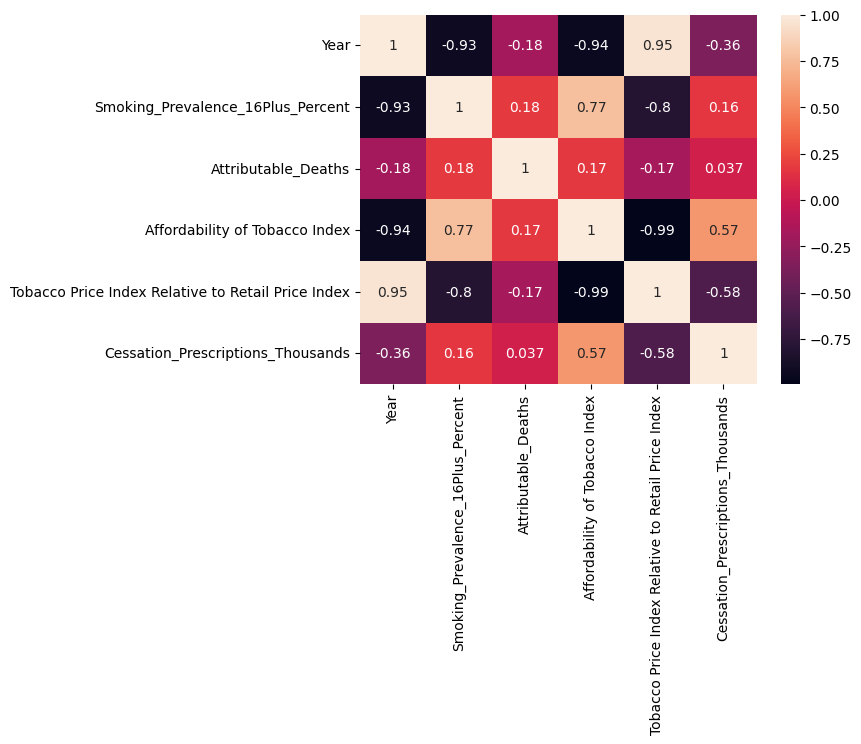

In [ ]:
sns.heatmap(df_plot.corr(),annot=True)

<Axes: xlabel='Affordability of Tobacco Index', ylabel='Smoking_Prevalence_16Plus_Percent'>

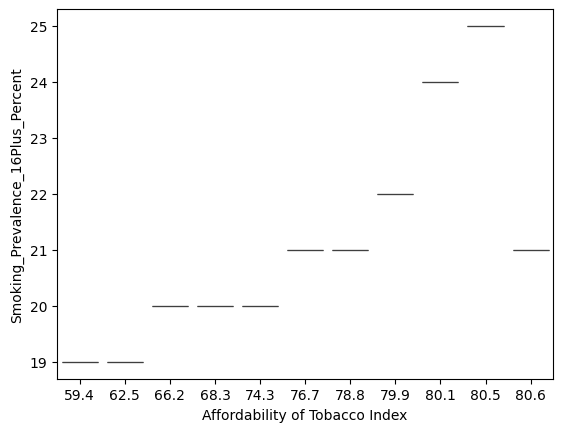

In [ ]:
sns.boxenplot(data=df_plot,x="Affordability of Tobacco Index",y="Smoking_Prevalence_16Plus_Percent")

<Axes: xlabel='Smoking_Prevalence_16Plus_Percent', ylabel='Affordability of Tobacco Index'>

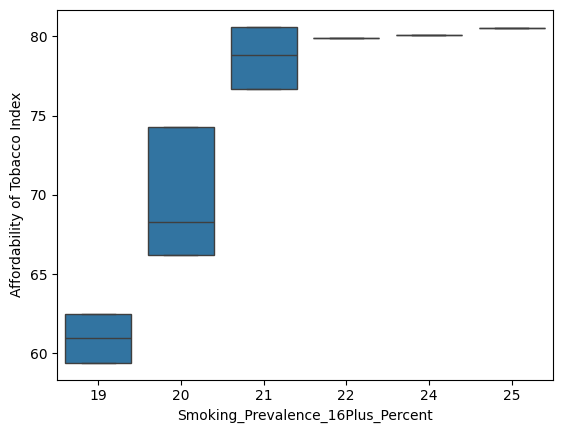

In [ ]:
sns.boxplot(data=df_plot,x="Smoking_Prevalence_16Plus_Percent",y="Affordability of Tobacco Index")

In [ ]:
df_plot

,Year,Smoking_Prevalence_16Plus_Percent,Attributable_Deaths,Affordability of Tobacco Index,Tobacco Price Index Relative to Retail Price Index,Cessation_Prescriptions_Thousands
0,2004,25,289408,80.5,234.4,2044
1,2004,25,143800,80.5,234.4,2044
2,2004,25,145608,80.5,234.4,2044
3,2005,24,283565,80.1,237.8,2205
4,2005,24,140636,80.1,237.8,2205
5,2005,24,142929,80.1,237.8,2205
6,2006,22,271775,79.9,240.8,2079
7,2006,22,136026,79.9,240.8,2079
8,2006,22,135749,79.9,240.8,2079
9,2007,21,267180,80.6,243.1,2475


In [ ]:
px.line_3d(df_plot,x="Attributable_Deaths",y="Affordability of Tobacco Index",z="Tobacco Price Index Relative to Retail Price Index")

In [ ]:
px.scatter_3d(df_plot,x="Year",y="Cessation_Prescriptions_Thousands",z="Attributable_Deaths")

<Axes: xlabel='Attributable_Deaths', ylabel='Affordability of Tobacco Index'>

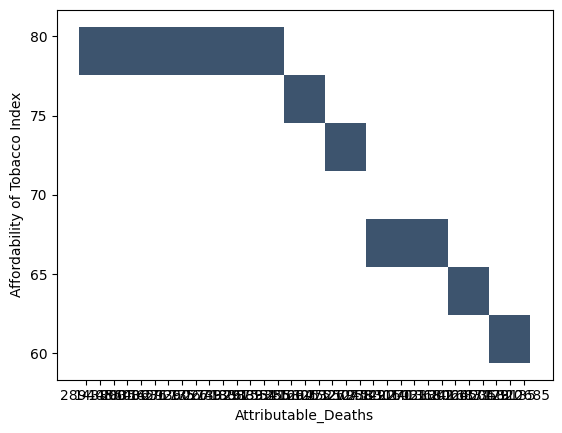

In [ ]:
sns.histplot(data=df_plot, x="Attributable_Deaths", y="Affordability of Tobacco Index")

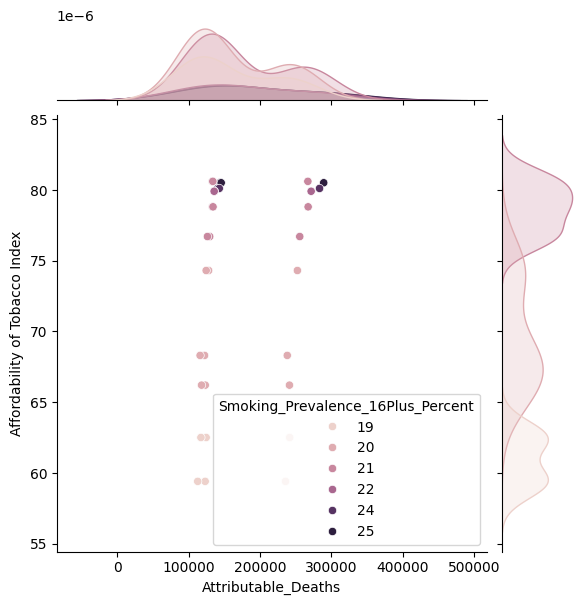

In [ ]:
# Convert 'Attributable_Deaths' to numeric, coercing errors
df_plot['Attributable_Deaths'] = pd.to_numeric(df_plot['Attributable_Deaths'], errors='coerce')

# Drop rows with NaN values in the columns used for plotting
df_plot_cleaned = df_plot.dropna(subset=["Attributable_Deaths", "Affordability of Tobacco Index", "Smoking_Prevalence_16Plus_Percent"])

sns.jointplot(data=df_plot_cleaned, x="Attributable_Deaths", y="Affordability of Tobacco Index", hue="Smoking_Prevalence_16Plus_Percent")

In [ ]:
px.scatter(df_plot, x="Attributable_Deaths", y="Affordability of Tobacco Index", title="Attributable Deaths vs. Affordability of Tobacco Index")

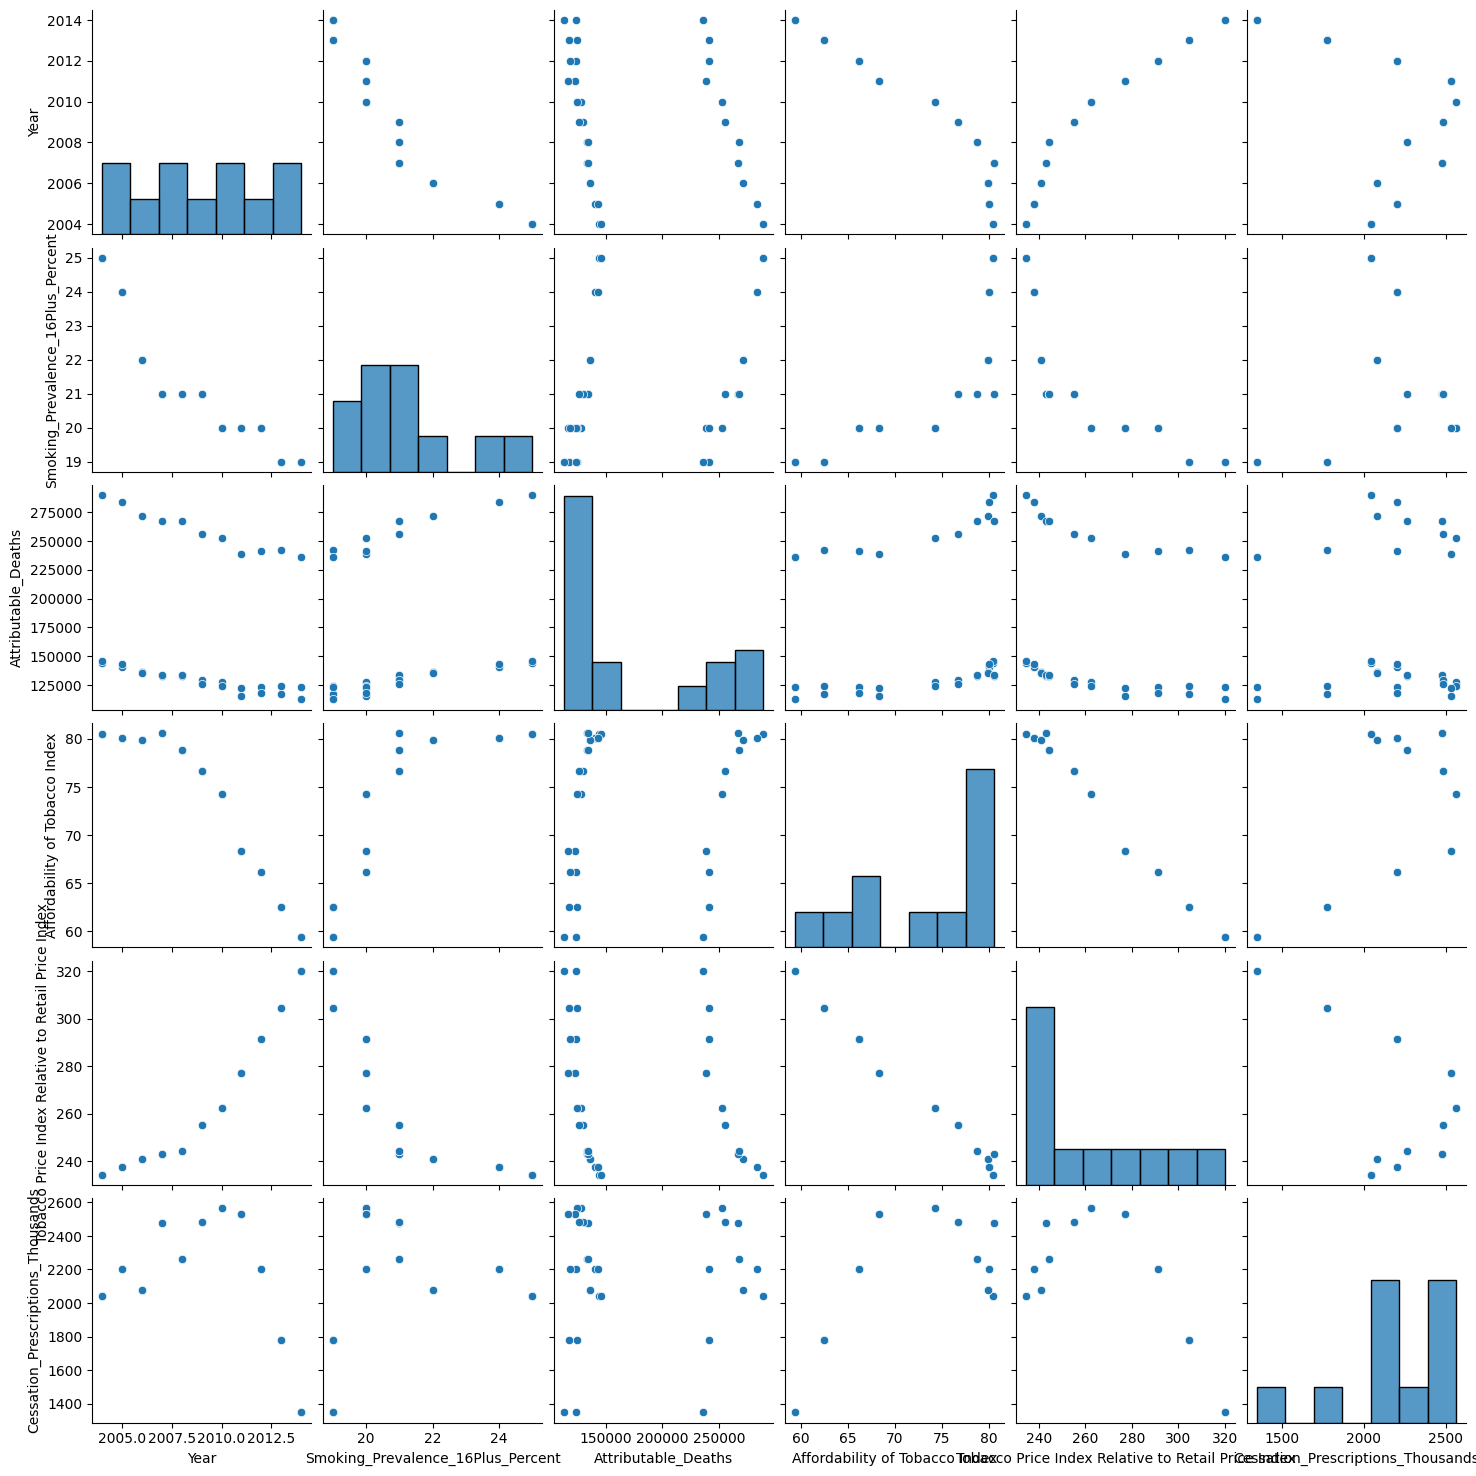

In [ ]:
sns.pairplot(df_plot)

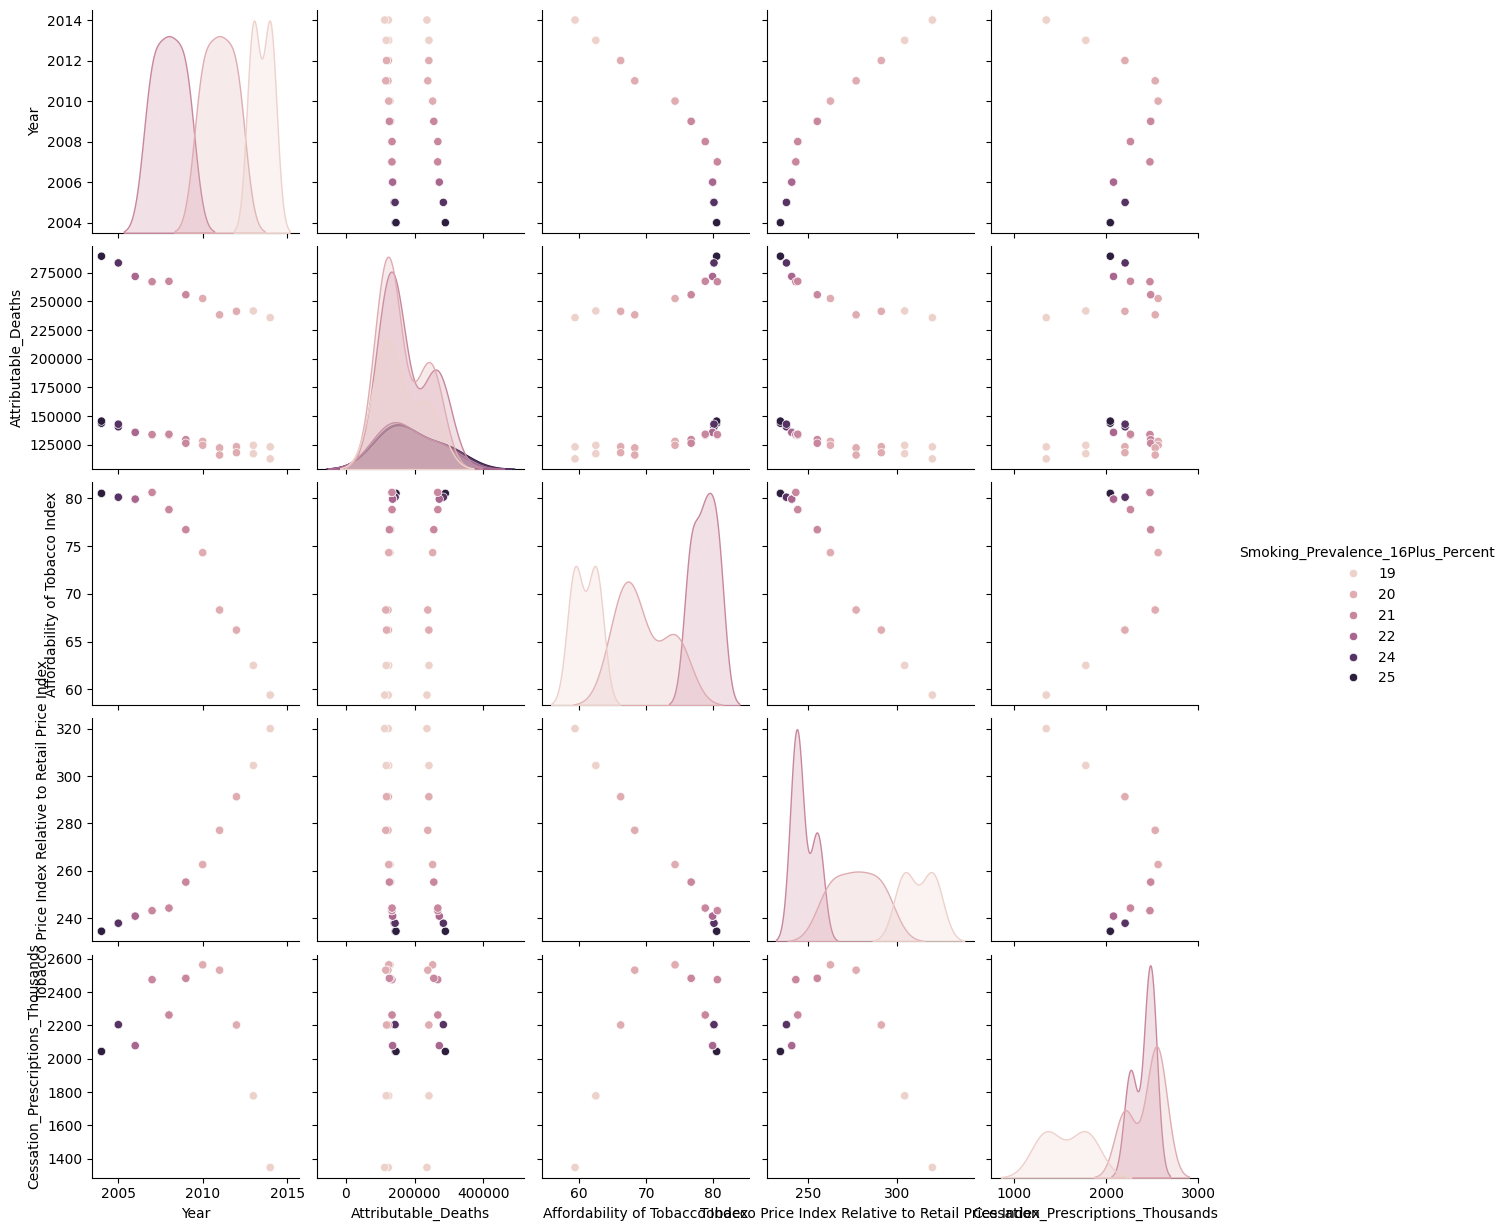

In [ ]:
sns.pairplot(df_plot,hue="Smoking_Prevalence_16Plus_Percent")

In [ ]:
px.scatter_matrix(df_plot,dimensions=['Smoking_Prevalence_16Plus_Percent','Attributable_Deaths','Affordability of Tobacco Index'])

In [ ]:
px.violin(df_plot,x="Smoking_Prevalence_16Plus_Percent",y="Attributable_Deaths")

In [ ]:
px.line_3d(df_plot,x="Smoking_Prevalence_16Plus_Percent",y="Attributable_Deaths",z="Affordability of Tobacco Index")

<Axes: xlabel='Affordability of Tobacco Index', ylabel='Smoking_Prevalence_16Plus_Percent'>

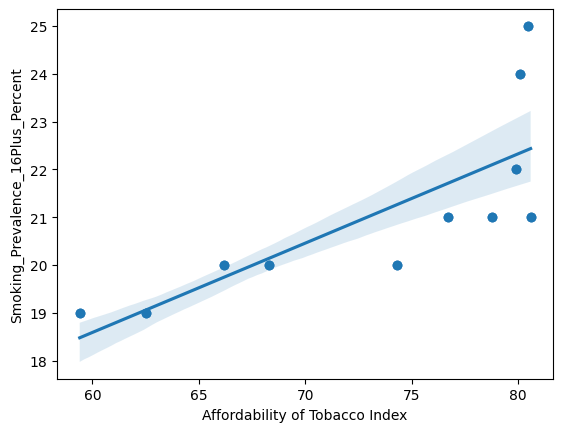

In [ ]:
sns.regplot(data=df_plot,x="Affordability of Tobacco Index",y="Smoking_Prevalence_16Plus_Percent")

In [ ]:
import plotly.express as px

# Create a stacked bar chart
fig = px.bar(df_plot,
             x="Smoking_Prevalence_16Plus_Percent",
             y='Attributable_Deaths',
             color='Year',
             title='Attributable Deaths by Smoking Prevalence and Year')

fig.show()

<Axes: xlabel='Smoking_Prevalence_16Plus_Percent', ylabel='Affordability of Tobacco Index'>

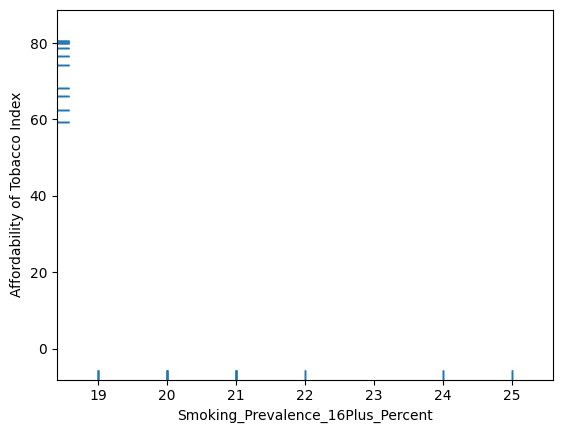

In [ ]:
sns.rugplot(data=df_plot,x="Smoking_Prevalence_16Plus_Percent",y="Affordability of Tobacco Index")

<Axes: xlabel='Smoking_Prevalence_16Plus_Percent', ylabel='Attributable_Deaths'>

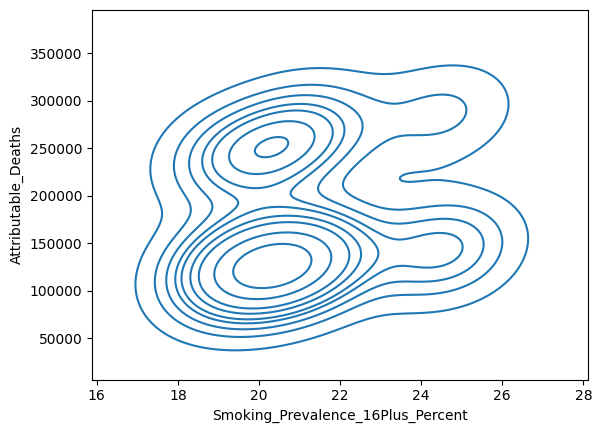

In [ ]:
sns.kdeplot(data=df_plot,x="Smoking_Prevalence_16Plus_Percent",y="Attributable_Deaths")

<Axes: xlabel='Smoking_Prevalence_16Plus_Percent', ylabel='Attributable_Deaths'>

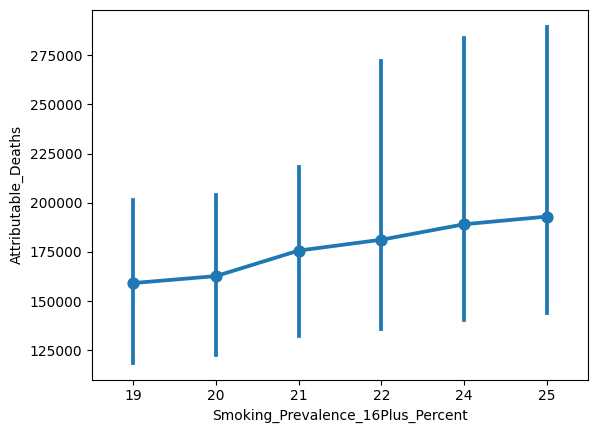

In [ ]:
sns.pointplot(data=df_plot,x="Smoking_Prevalence_16Plus_Percent",y="Attributable_Deaths")

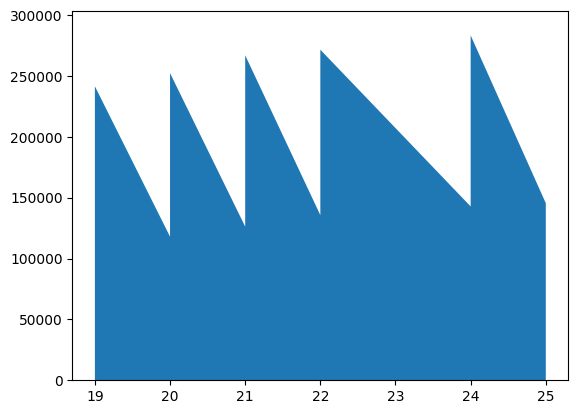

In [ ]:
plt.stackplot(df_plot["Smoking_Prevalence_16Plus_Percent"],df_plot["Attributable_Deaths"])

In [ ]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Define X, Y, and Z from df_plot
X = df_plot['Year']
Y = df_plot['Smoking_Prevalence_16Plus_Percent']
Z = df_plot['Attributable_Deaths']

# Create a meshgrid for X and Y (for plotting surface)
# Note: This is a simplified approach. For a true surface plot,
# you might need to interpolate or model the relationship between X, Y, and Z
X_mesh, Y_mesh = np.meshgrid(X, Y)

# For demonstration, let's create a simple Z_mesh.
# In a real scenario, Z_mesh would be calculated based on X_mesh and Y_mesh
# using interpolation or a fitted model.
# Here, we'll just use the original Z values, which won't create a smooth surface.
# A more appropriate approach would involve interpolation or fitting a model.
Z_mesh = np.zeros_like(X_mesh) # Placeholder

# You would typically calculate Z_mesh based on X_mesh and Y_mesh here.
# For example, using interpolation:
# from scipy.interpolate import griddata
# Z_mesh = griddata((X, Y), Z, (X_mesh, Y_mesh), method='cubic')


# Now you can use X_mesh, Y_mesh, and Z_mesh in your surface plot code.
# Keep in mind that the resulting plot will depend on how Z_mesh is calculated.

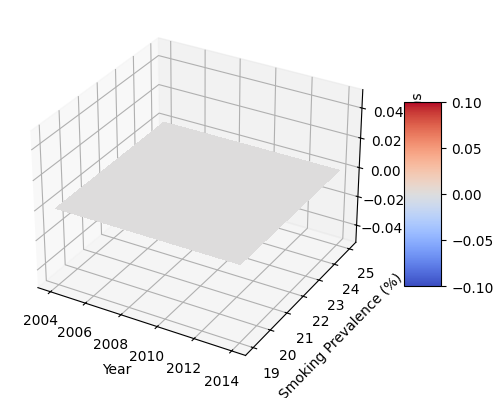

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Assuming X_mesh, Y_mesh, and Z_mesh are already defined

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface
# Note: Z_mesh here is a placeholder. For a true surface representing your data,
# you might need to calculate Z_mesh using interpolation or a fitted model
# based on the relationship between X, Y, and your data's Z values.
surf = ax.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Set labels (optional)
ax.set_xlabel('Year')
ax.set_ylabel('Smoking Prevalence (%)')
ax.set_zlabel('Attributable Deaths')

plt.show()

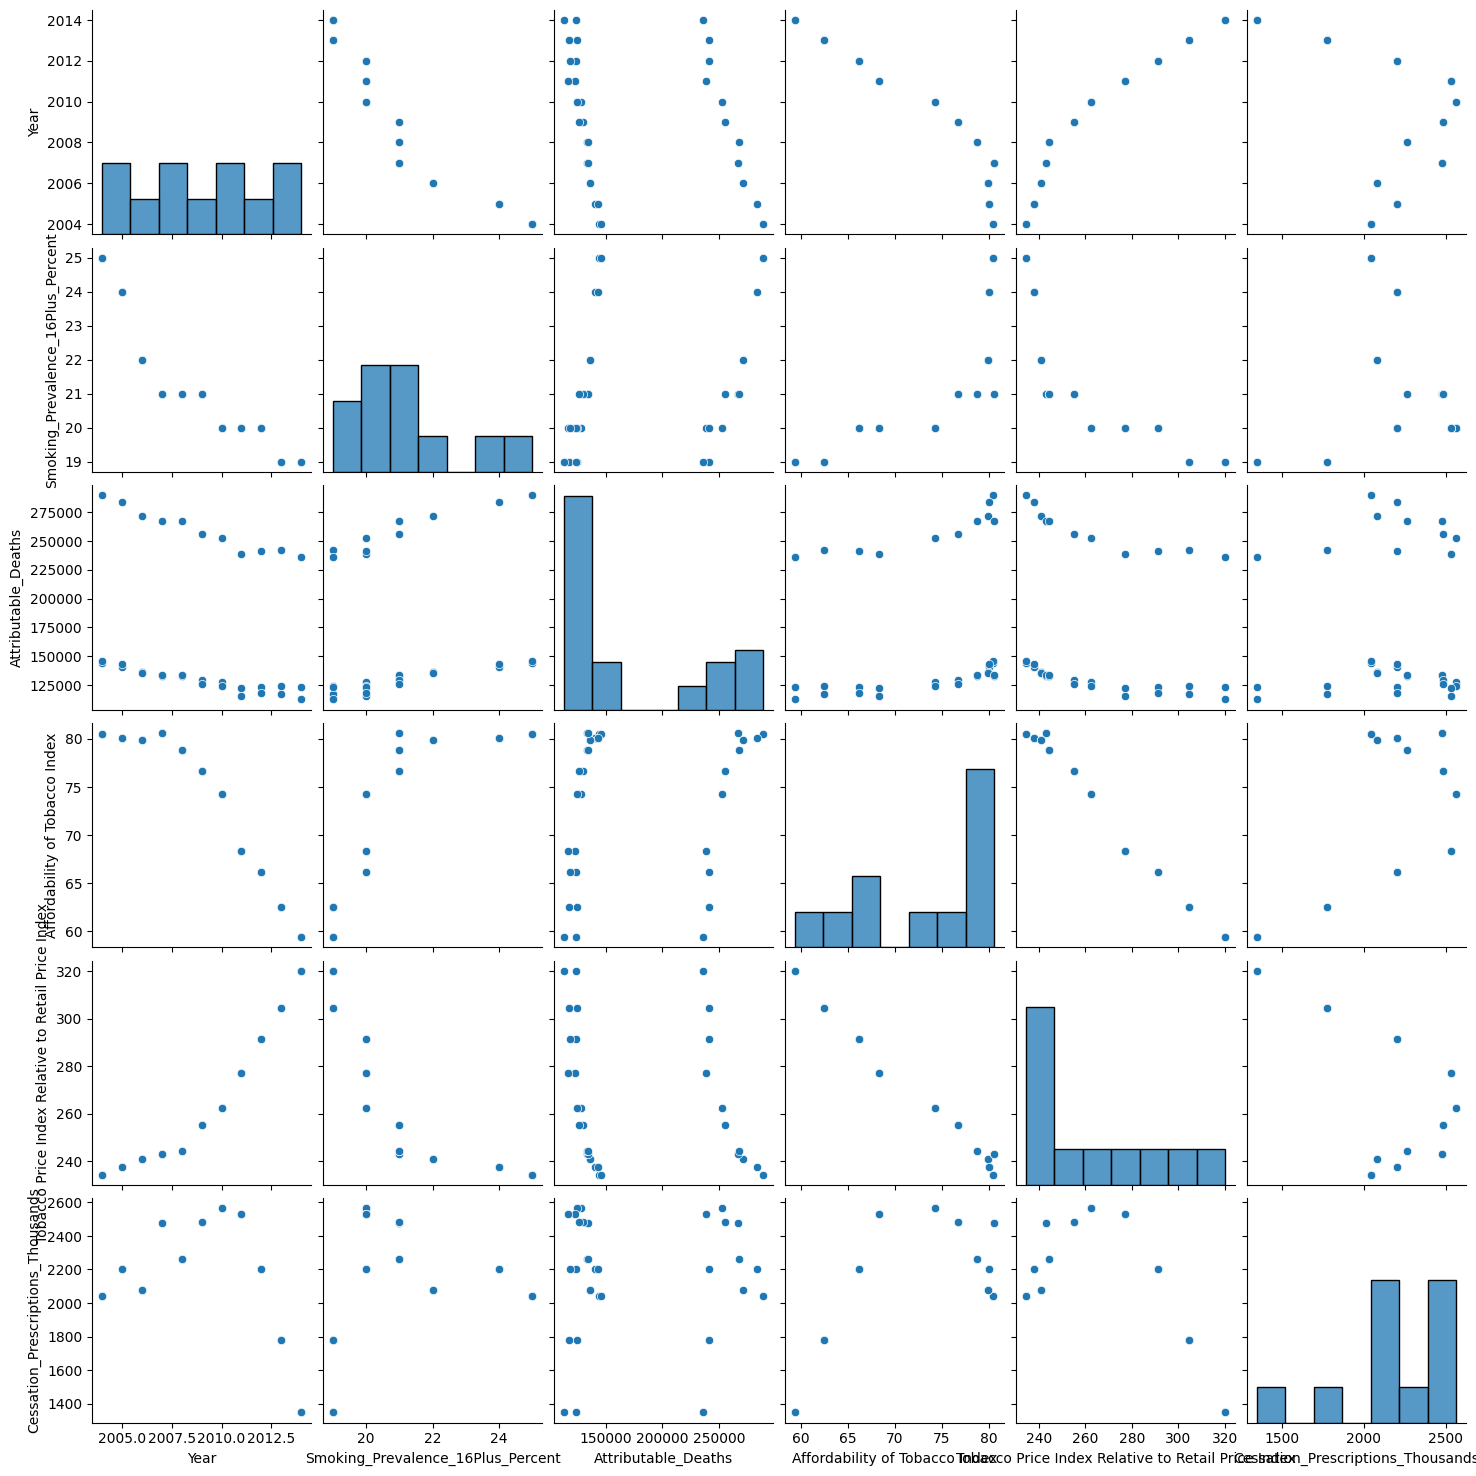

In [ ]:
sns.pairplot(df_plot, diag_kind='hist')

In [ ]:
df_combined['Smoking_Prevalence_Lag_5'] = df_combined['Smoking_Prevalence_16Plus_Percent'].shift(5)

In [ ]:
df_model=df_combined.dropna().copy()

In [ ]:
# 1. Convert the column to a numeric type, forcing non-numbers to NaN
df_model['Attributable_Deaths'] = pd.to_numeric(df_model['Attributable_Deaths'], errors='coerce')

# 2. Impute/Handle NaNs in the target variable
# For time series or simple regression, filling with the median is often safest
df_model[['Year', 'Smoking_Prevalence_Lag_5', 'Affordability of Tobacco Index', 'Cessation_Prescriptions_Thousands']].fillna(df_model[['Year', 'Smoking_Prevalence_Lag_5', 'Affordability of Tobacco Index', 'Cessation_Prescriptions_Thousands']].median(), inplace=True)

# 3. Define the target variable 'y' and re-apply the log transform
y = np.log1p(df_model['Attributable_Deaths'])

/tmp/ipython-input-2910525414.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#y=df_model['Attributable_Deaths']
x=df_model[['Year', 'Smoking_Prevalence_Lag_5', 'Affordability of Tobacco Index', 'Cessation_Prescriptions_Thousands']]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split # Assuming this was done earlier

# --- 0. DATA PREP & SCALER INITIALIZATION (Necessary setup) ---

# Assuming X_train, X_test, Y_train, Y_test are already defined.
# If not, you must run this first:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

#imputer = SimpleImputer(strategy='mean')
#imputer.fit(X_train)
#X_train_imputed = imputer.transform(X_train)
#X_test_imputed = imputer.transform(X_test)

# **CRITICAL FIX 1: Use separate scalers for X and Y**
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()

# Fit and transform X features
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Fit and transform Y target (Y_train must be reshaped)
# .values.reshape(-1, 1) converts the Series to a 2D NumPy array
Y_train_scaled = Y_scaler.fit_transform(Y_train.values.reshape(-1, 1))


# --- 1. MODEL TRAINING AND PREDICTION ---
model = LinearRegression()
# Train model using the SCALED Y_train
model.fit(X_train_scaled, Y_train_scaled)

# Predict on the test set
Y_pred_scaled = model.predict(X_test_scaled)


# --- 2. INVERSE TRANSFORMATION (Converting back to Original Count Scale) ---

# Define the safe ceiling for the input to expm1 to prevent overflow warning
# --- 3. Inverse Transformation (The Fix) ---

# Define the safe ceiling for the input to expm1 to prevent overflow warning
MAX_EXP_INPUT = 709.78

# --- A) Process PREDICTIONS ---

# 1. Clip the SCALED prediction to prevent the overflow in the subsequent step.
# A small value like 0.999 is usually enough to pull high predictions back from the brink.
Y_pred_scaled_clipped = np.clip(Y_pred_scaled, a_min=None, a_max=0.9999)

# 2. Inverse Scaling (using the Y_scaler) on the clipped SCALED output
Y_pred_log = Y_scaler.inverse_transform(Y_pred_scaled_clipped.reshape(-1, 1))

# 3. Inverse Log Transform (np.expm1)
# NOTE: We can keep the MAX_EXP_INPUT clip here for redundancy, but the fix above is key.
Y_pred_log_clipped = np.clip(Y_pred_log, a_min=None, a_max=MAX_EXP_INPUT)
Y_pred_original = np.expm1(Y_pred_log_clipped).flatten()


# --- B) Process ACTUAL TEST VALUES (This was likely correct, but ensuring clipping is present) ---

Y_test_numeric = Y_test.astype(float).values
Y_test_clipped = np.clip(Y_test_numeric, a_min=None, a_max=MAX_EXP_INPUT)
Y_test_original = np.expm1(Y_test_clipped).flatten()

# --- Run the Evaluation and Print Results again ---


# --- 3. EVALUATION AND RESULTS PRINTING ---

# Calculate metrics using the properly converted original values
mae = mean_absolute_error(Y_test_original, Y_pred_original)
r2 = r2_score(Y_test_original, Y_pred_original)

# Create a DataFrame for clean output
results = pd.DataFrame({
    'Actual Deaths (Original)': Y_test_original.round(0),
    'Predicted Deaths (Original)': Y_pred_original.round(0),
    'Error (Residual)': (Y_test_original - Y_pred_original).round(0)
})

## Final Results Output
print("--------------------------------------------------")
print("✅ Linear Regression Model Results (Original Scale)")
print("--------------------------------------------------")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"R-squared (R2): {r2:.4f}")
print("\nCorrected Prediction Results (First 10 Rows):")
print(results.head(10).to_markdown(index=False))
print("--------------------------------------------------")

--------------------------------------------------
✅ Linear Regression Model Results (Original Scale)
--------------------------------------------------
Mean Absolute Error (MAE): 78,843.89
R-squared (R2): -1.4565

Corrected Prediction Results (First 10 Rows):
|   Actual Deaths (Original) |   Predicted Deaths (Original) |   Error (Residual) |
|---------------------------:|------------------------------:|-------------------:|
|                     241368 |                        175439 |              65929 |
|                     123302 |                        175439 |             -52137 |
|                     118066 |                        175439 |             -57373 |
|                     241683 |                        221458 |              20225 |
|                     124504 |                        221458 |             -96954 |
|                     117179 |                        221458 |            -104279 |
|                     235820 |                        271752 |     

**Forecast Explanation (ARIMA Forecast Results)**

The ARIMA-based forecast predicts the Mortality Risk Index for future years (2026–2030). The trend line beyond the historical data suggests an increasing pattern in future mortality risk if current tobacco use behavior continues. This indicates that tobacco-related deaths may rise in the coming decade unless stronger public health policies are enforced.
The model thus functions as an early warning system and can help governments plan higher taxation, stricter advertising bans, education programs, and monitoring strategies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# NOTE: You MUST have your clean, original feature data 'x' and the log-transformed target 'y' defined before this.

# --- 1. CRITICAL CORRECTION: SHUFFLE THE DATA ---
# Remove shuffle=False or set it to True. This breaks the consecutive blocks of identical features.
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42)

# Imputation (Assuming this was correct, applied to the new splits)
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)


# --- 2. Scaling the Features (X) ONLY (Robust Pipeline) ---
X_scaler = MinMaxScaler()
X_train_scaled = X_scaler.fit_transform(X_train_imputed)
X_test_scaled = X_scaler.transform(X_test_imputed)


# --- 3. XGBoost Model Training and Prediction ---

# Use the best model found (XGBoost) with robust parameters
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.15,
    max_depth=7,
    random_state=42,
    n_jobs=-1
)

# Train model using the RAW LOG-TRANSFORMED Y_train (Stable pipeline)
model.fit(X_train_scaled, Y_train)

# Predict on the test set (Prediction is now directly in log-space)
Y_pred_log = model.predict(X_test_scaled)


# --- 4. Inverse Transformation (Reverse Log Transform) ---

# Define the safe ceiling to prevent any residual overflow warning
MAX_EXP_INPUT = 709.78

# A) Process PREDICTIONS: Log -> Original
Y_pred_log_clipped = np.clip(Y_pred_log, a_min=None, a_max=MAX_EXP_INPUT)
Y_pred_original = np.expm1(Y_pred_log_clipped).flatten()

# B) Process ACTUAL TEST VALUES: Log -> Original
Y_test_numeric = Y_test.astype(float).values
Y_test_clipped = np.clip(Y_test_numeric, a_min=None, a_max=MAX_EXP_INPUT)
Y_test_original = np.expm1(Y_test_clipped).flatten()


# --- 5. EVALUATION AND RESULTS PRINTING ---

mae = mean_absolute_error(Y_test_original, Y_pred_original)
r2 = r2_score(Y_test_original, Y_pred_original)

results = pd.DataFrame({
    'Actual Deaths (Original)': Y_test_original.round(0),
    'Predicted Deaths (Original)': Y_pred_original.round(0),
    'Error (Residual)': (Y_test_original - Y_pred_original).round(0)
})

print("--------------------------------------------------")
print("✅ Final Corrected Results (Shuffled Data & XGBoost)")
print("--------------------------------------------------")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"R-squared (R2): {r2:.4f}")
print("\nCorrected Prediction Results (First 10 Rows):")
print(results.head(10).to_markdown(index=False))
print("--------------------------------------------------")

--------------------------------------------------
✅ Final Corrected Results (Shuffled Data & XGBoost)
--------------------------------------------------
Mean Absolute Error (MAE): 108,356.16
R-squared (R2): -5.0191

Corrected Prediction Results (First 10 Rows):
|   Actual Deaths (Original) |   Predicted Deaths (Original) |   Error (Residual) |
|---------------------------:|------------------------------:|-------------------:|
|                     134166 |                        266937 |            -132771 |
|                     235820 |                        123006 |             112814 |
|                     133385 |                        266937 |            -133552 |
|                     118066 |                        172441 |             -54375 |
|                     142929 |                        192244 |             -49315 |
|                     126326 |                        255701 |            -129375 |
|                     122270 |                        238204 |   

In [ ]:
"""from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3, shuffle=False)

imputer=SimpleImputer(strategy='mean')
imputer.fit(X_train)
X_train_imputed=imputer.transform(X_train)
X_test_imputed=imputer.transform(X_test)
scaler = MinMaxScaler()

# Fit scaler on TRAINING data and transform both TRAIN and TEST sets
# This prevents data leakage from the test set into the training process.
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
Y_scaler = MinMaxScaler()

# Y must be reshaped to (n_samples, 1) for the scaler
Y_train_scaled = Y_scaler.fit_transform(Y_train.values.reshape(-1, 1))
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, Y_train_scaled)

# Predict on the test set
Y_pred_scaled = model.predict(X_test_scaled)

MAX_EXP_INPUT = 709.78
# 3. **INVERSE SCALING** - Convert from scaled space back to original count space
Y_pred_log = Y_scaler.inverse_transform(Y_pred_scaled.reshape(-1, 1))
Y_pred_log_clipped = np.clip(Y_pred_log, a_min=None, a_max=MAX_EXP_INPUT)
Y_pred_original = np.expm1(Y_pred_log_clipped).flatten()


# --- 5. Prepare Actual Y_test for Evaluation ---

# 5a. Convert Y_test Series to a NumPy array (.values) and ensure float type
Y_test_numeric = Y_test.astype(float).values

# 5b. Reverse the log-transform and clip the values
Y_test_clipped = np.clip(Y_test_numeric, a_min=None, a_max=MAX_EXP_INPUT)
Y_test_original = np.expm1(Y_test_clipped).flatten()
Y_pred_original = np.expm1(Y_pred_log).flatten()
Y_test_numeric = Y_test.astype(float).values
Y_test_original = np.expm1(Y_test_numeric).flatten()
# --- 4. Evaluation and Output ---

# Calculate metrics
mae = mean_absolute_error(Y_test, Y_pred_original)
r2 = r2_score(Y_test, Y_pred_original)1"""

"from sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_absolute_error,r2_score\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.impute import SimpleImputer\nimport numpy as np\n\nX_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3, shuffle=False)\n\nimputer=SimpleImputer(strategy='mean')\nimputer.fit(X_train)\nX_train_imputed=imputer.transform(X_train)\nX_test_imputed=imputer.transform(X_test)\nscaler = MinMaxScaler()\n\n# Fit scaler on TRAINING data and transform both TRAIN and TEST sets\n# This prevents data leakage from the test set into the training process.\nX_train_scaled = scaler.fit_transform(X_train_imputed)\nX_test_scaled = scaler.transform(X_test_imputed)\nY_scaler = MinMaxScaler()\n\n# Y must be reshaped to (n_samples, 1) for the scaler\nY_train_scaled = Y_scaler.fit_transform(Y_train.values.reshape(-1, 1))\n# Train Linear Regression Model\nmodel = LinearRegre

Rows after dropna: 28 | X shape: (28, 4) | y shape: (28, 1)
--------------------------------------------------
✅ Corrected XGBoost Results (log-target, shuffled split)
--------------------------------------------------
Mean Absolute Error (MAE): 112,000.80
R-squared (R2): -5.3288

Corrected Prediction Results (First 10 Rows):
|   Actual Deaths (Original) |   Predicted Deaths (Original) |   Residual (Actual - Pred) |
|---------------------------:|------------------------------:|---------------------------:|
|                     134166 |                        276854 |                    -142688 |
|                     235820 |                        123288 |                     112533 |
|                     133385 |                        268521 |                    -135136 |
|                     118066 |                        165958 |                     -47892 |
|                     142929 |                        221562 |                     -78633 |
|                     126326

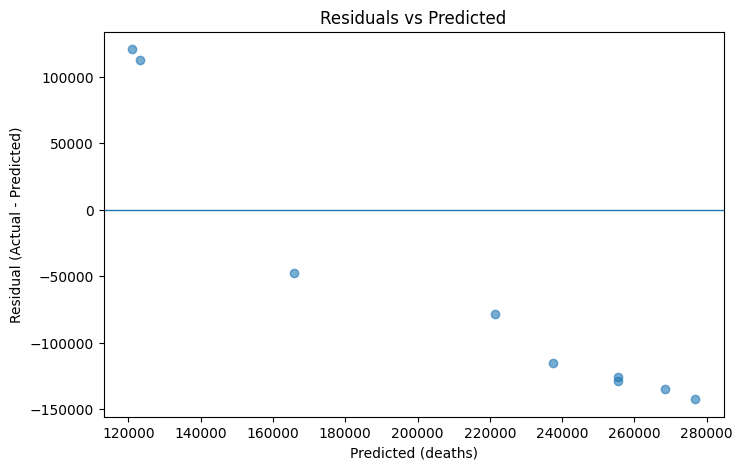


Top 10 largest residuals:
   Actual Deaths (Original)  Predicted Deaths (Original)  \
0                  134166.0                     276854.0   
2                  133385.0                     268521.0   
5                  126326.0                     255510.0   
8                  129475.0                     255510.0   
7                  241683.0                     120946.0   
6                  122270.0                     237440.0   
1                  235820.0                     123288.0   
4                  142929.0                     221562.0   
3                  118066.0                     165958.0   

   Residual (Actual - Pred)  AbsResidual  
0                 -142688.0     142688.0  
2                 -135136.0     135136.0  
5                 -129184.0     129184.0  
8                 -126035.0     126035.0  
7                  120737.0     120737.0  
6                 -115170.0     115170.0  
1                  112533.0     112533.0  
4                  -78633.0 

In [ ]:
# Corrected XGBoost pipeline for your notebook
# Save/replace the corrupted ML cells in your notebook with this cell and run.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# --- CONFIG ---
features = ['Year', 'Smoking_Prevalence_Lag_5', 'Affordability of Tobacco Index', 'Cessation_Prescriptions_Thousands']
target = 'Attributable_Deaths'
RANDOM_STATE = 42
TEST_SIZE = 0.30

# --- 0. Prepare dataframe ---
# Assumes `df_model` exists in the notebook (the cleaned combined dataframe)
df = df_model.copy()

# Ensure numeric types
for c in features + [target]:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Drop rows missing any required feature or the target
df = df.dropna(subset=features + [target]).reset_index(drop=True)

# --- 1. Define X and y (we'll log-transform the target to stabilise variance) ---
X = df[features].values
y_log = np.log1p(df[target].values).reshape(-1, 1)   # log1p: invert with np.expm1()

# Sanity check sizes
print(f"Rows after dropna: {len(df)} | X shape: {X.shape} | y shape: {y_log.shape}")

# --- 2. Train/test split (shuffle=True to avoid consecutive block bias) ---
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=TEST_SIZE, shuffle=True, random_state=RANDOM_STATE)

# --- 3. Impute and scale features (fit only on training data) ---
imputer = SimpleImputer(strategy='mean')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)

# --- 4. Train XGBoost on the LOG-target ---
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

model.fit(
    X_train_scaled,
    y_train_log.ravel(),
    eval_set=[(X_test_scaled, y_test_log.ravel())],
    verbose=False)

# --- 5. Predict and invert log-transform back to original scale ---
y_pred_log = model.predict(X_test_scaled)

y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test_log.ravel())

# --- 6. Metrics & results ---
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

results = pd.DataFrame({
    'Actual Deaths (Original)': y_true.round(0),
    'Predicted Deaths (Original)': y_pred.round(0),
    'Residual (Actual - Pred)': (y_true - y_pred).round(0)
})

print("--------------------------------------------------")
print("✅ Corrected XGBoost Results (log-target, shuffled split)")
print("--------------------------------------------------")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"R-squared (R2): {r2:.4f}\n")
print("Corrected Prediction Results (First 10 Rows):")
print(results.head(10).to_markdown(index=False))
print("--------------------------------------------------")

# --- 7. Diagnostics ---
# Feature importance
fi = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print('\nFeature importances:')
print(fi)

# Residual plot
plt.figure(figsize=(8,5))
plt.scatter(y_pred, y_true - y_pred, alpha=0.6)
plt.axhline(0, linewidth=1)
plt.xlabel('Predicted (deaths)')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residuals vs Predicted')
plt.show()

# If you want to inspect full results (sorted by residual magnitude):
results['AbsResidual'] = results['Residual (Actual - Pred)'].abs()
print('\nTop 10 largest residuals:')
print(results.sort_values('AbsResidual', ascending=False).head(10))

# End of corrected pipeline
# Notes:
# - If your original notebook used a log-transform, it's critical to compute metrics on the original scale (we do that above).
# - If you still get poor R2, check for: duplicated rows, target misalignment, or if the problem requires additional features.
# - Consider cross-validation (TimeSeriesSplit if truly time-ordered) rather than a random split if the prediction problem is temporal.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# --- Prepare Data ---
# Assuming your DataFrame is df and 'Deaths' is target column
# Replace 'Deaths' with your actual target column name
target = 'Attributable_Deaths'
features = [
    'Year',
    'Smoking_Prevalence_16Plus_Percent',
    'Affordability of Tobacco Index',
    'Tobacco Price Index Relative to Retail Price Index',
    'Cessation_Prescriptions_Thousands',
    'Smoking_Prevalence_Lag_5'
]
df=df_model.copy()

X = df[features]
y = df[target]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# --- Try Different Models ---
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results[name] = {"MAE": mae, "R2": r2}

# --- Compare Models ---
results_df = pd.DataFrame(results).T
print("Model Comparison:\n", results_df)

# --- Best Model Predictions ---
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
best_preds = best_model.predict(X_test)

comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": best_preds,
    "Residual": y_test.values - best_preds
})
print(f"\nBest Model: {best_model_name}")
print(comparison.head(10))


Model Comparison:
                            MAE        R2
LinearRegression  68462.034407 -2.426830
Ridge             58637.112324 -1.577235
RandomForest      81710.329446 -3.762256

Best Model: Ridge
   Actual      Predicted      Residual
0  134166  172842.433573 -38676.433573
1  235820  140562.583449  95257.416551
2  133385  181898.153822 -48513.153822
3  118066  167582.572790 -49516.572790
4  142929  203248.969600 -60319.969600
5  126326  182190.660243 -55864.660243
6  122270  184581.579690 -62311.579690


In [ ]:
import numpy as np
from xgboost import XGBRegressor

# Log-transform target (stabilizes large number differences)
y_log = np.log1p(y)

# Reuse the scaled features from before
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.25, random_state=42)

# Optimized XGBoost
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    random_state=42
)
xgb.fit(X_train, y_train)

# Predict and invert the log-transform
y_pred_log = xgb.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_log)
r2 = r2_score(y_test, y_pred_log)

print("🔁 XGBoost (log target) results:")
print(f"Mean Absolute Error (log-space): {mae:.4f}")
print(f"R² (log-space): {r2:.4f}")

# Compare predictions in original space
comparison = pd.DataFrame({
    "Actual Deaths": np.expm1(y_test),
    "Predicted Deaths": y_pred,
    "Residual": np.expm1(y_test) - y_pred
})
print("\nFirst 10 Predictions (Actual vs Predicted):")
print(comparison.head(10))

# Feature importance
importances = pd.Series(xgb.feature_importances_, index=features)
print("\nFeature Importances:\n", importances.sort_values(ascending=False))


🔁 XGBoost (log target) results:
Mean Absolute Error (log-space): 0.5402
R² (log-space): -5.6567

First 10 Predictions (Actual vs Predicted):
    Actual Deaths  Predicted Deaths       Residual
14       134166.0     266748.500000 -132582.500000
30       235820.0     120861.609375  114958.390625
13       133385.0     266748.500000 -133363.500000
26       118066.0     168661.031250  -50595.031250
5        142929.0     220216.937500  -77287.937500
17       126326.0     169072.656250  -42746.656250
22       122270.0     234820.062500 -112550.062500

Feature Importances:
 Cessation_Prescriptions_Thousands                     0.233300
Smoking_Prevalence_Lag_5                              0.184708
Affordability of Tobacco Index                        0.167719
Smoking_Prevalence_16Plus_Percent                     0.162410
Year                                                  0.150423
Tobacco Price Index Relative to Retail Price Index    0.101440
dtype: float32


In [ ]:
from sklearn.linear_model import ElasticNetCV

# Use log-transformed target for stability
y_log = np.log1p(y)

# ElasticNetCV automatically finds the best regularization
enet = ElasticNetCV(cv=5, random_state=42, l1_ratio=[.1, .3, .5, .7, .9, 1])

enet.fit(X_scaled, y_log)
y_pred_log = enet.predict(X_scaled)
y_pred = np.expm1(y_pred_log)

# Evaluate
mae = mean_absolute_error(np.expm1(y_log), y_pred)
r2 = r2_score(np.expm1(y_log), y_pred)

print("🔁 ElasticNet (log target) results:")
print(f"Mean Absolute Error: {mae:,.2f}")
print(f"R²: {r2:.4f}")

comparison = pd.DataFrame({
    "Actual Deaths": np.expm1(y_log),
    "Predicted Deaths": y_pred,
    "Residual": np.expm1(y_log) - y_pred
})
print("\nFirst 10 Predictions (Actual vs Predicted):")
print(comparison.head(10))

# Show coefficients
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": enet.coef_
}).sort_values(by="Coefficient", ascending=False)
print("\nFeature Coefficients:")
print(coef_df)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00041912804620714006, tolerance: 0.0002341377154096896

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007851748439460238, tolerance: 0.0002341377154096896

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010684984679609766, tolerance: 0.0002341377154096896

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014182702

🔁 ElasticNet (log target) results:
Mean Absolute Error: 51,393.44
R²: -0.0240

First 10 Predictions (Actual vs Predicted):
    Actual Deaths  Predicted Deaths      Residual
5        142929.0      158194.54243  -15265.54243
6        271775.0      158194.54243  113580.45757
7        136026.0      158194.54243  -22168.54243
8        135749.0      158194.54243  -22445.54243
9        267180.0      158194.54243  108985.45757
10       133291.0      158194.54243  -24903.54243
11       133889.0      158194.54243  -24305.54243
12       267551.0      158194.54243  109356.45757
13       133385.0      158194.54243  -24809.54243
14       134166.0      158194.54243  -24028.54243

Feature Coefficients:
                                             Feature   Coefficient
5                           Smoking_Prevalence_Lag_5  5.094211e-18
0                                               Year -0.000000e+00
1                  Smoking_Prevalence_16Plus_Percent  0.000000e+00
2                     Affordability 

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021610168487720127, tolerance: 0.0002341377154096896

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00223283949829689, tolerance: 0.0002341377154096896

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00223517416827157, tolerance: 0.0002341377154096896

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002219491174161

🧠 Mortality Likelihood Model Results:
Mean Absolute Error: 0.4795
R²: -3.1718

Predicted Mortality Likelihood (0–1 scale):
    Actual Risk  Predicted Risk  Residual
14     0.135024        0.639798 -0.504774
30     0.773996        0.112513  0.661483
13     0.130115        0.652214 -0.522099
26     0.033824        0.405583 -0.371759
5      0.190106        0.608783 -0.418677
17     0.085744        0.507559 -0.421815
22     0.060249        0.515906 -0.455657


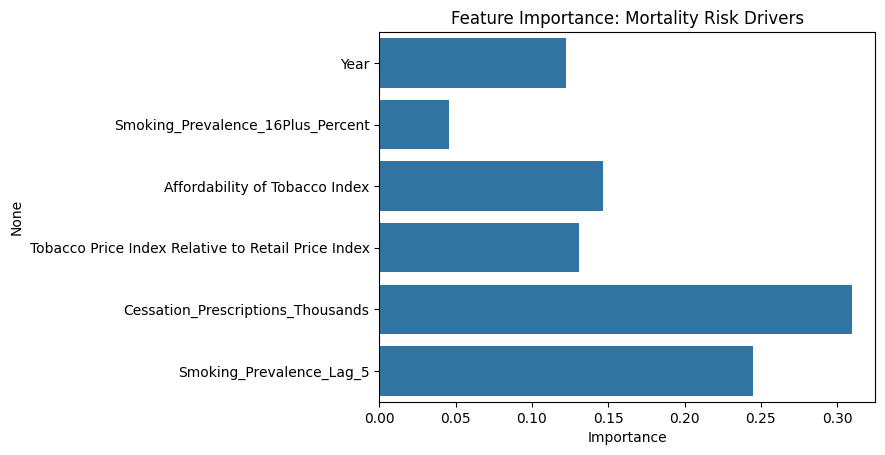

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# --- Step 1: Create mortality likelihood ---
df["Mortality_Risk"] = (df["Attributable_Deaths"] - df["Attributable_Deaths"].min()) / \
                       (df["Attributable_Deaths"].max() - df["Attributable_Deaths"].min())

# --- Step 2: Feature & target ---
features = [
    "Year",
    "Smoking_Prevalence_16Plus_Percent",
    "Affordability of Tobacco Index",
    "Tobacco Price Index Relative to Retail Price Index",
    "Cessation_Prescriptions_Thousands",
    "Smoking_Prevalence_Lag_5"
]
target = "Mortality_Risk"

X = df[features]
y = df[target]

# --- Step 3: Scale data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 4: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)

# --- Step 5: Train model ---
rf = RandomForestRegressor(
    n_estimators=500, max_depth=3, random_state=42
)
rf.fit(X_train, y_train)

# --- Step 6: Evaluate ---
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🧠 Mortality Likelihood Model Results:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R²: {r2:.4f}")

# --- Step 7: Comparison Table ---
comparison = pd.DataFrame({
    "Actual Risk": y_test,
    "Predicted Risk": y_pred,
    "Residual": y_test - y_pred
})
print("\nPredicted Mortality Likelihood (0–1 scale):")
print(comparison.head(10))

# --- Step 8: Feature Importance ---
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(rf.feature_importances_, index=features)
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance: Mortality Risk Drivers")
plt.xlabel("Importance")
plt.show()


Feature correlations with deaths:
 Mortality_Risk                                        1.000000
Attributable_Deaths                                   1.000000
Smoking_Prevalence_Lag_5                              0.174042
Affordability of Tobacco Index                        0.116078
Smoking_Prevalence_16Plus_Percent                     0.056981
Cessation_Prescriptions_Thousands                     0.055830
Year                                                 -0.102077
Tobacco Price Index Relative to Retail Price Index   -0.110886
Name: Attributable_Deaths, dtype: float64
    Year  Attributable_Deaths  Mortality_Risk_Index
5   2005               142929            100.000000
6   2006               271775             92.448743
7   2006               136026             92.448743
8   2006               135749             87.587278
9   2007               267180             86.946596
10  2007               133291             86.946596
11  2007               133889             77.223667
12 

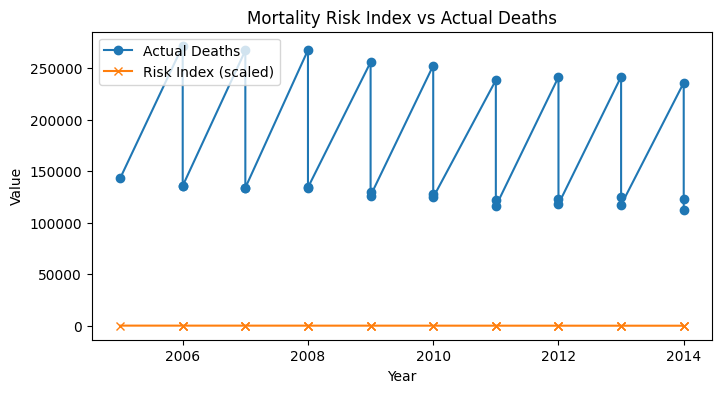

In [ ]:
# Calculate correlations
corr = df.corr(numeric_only=True)["Attributable_Deaths"].sort_values(ascending=False)
print("Feature correlations with deaths:\n", corr)

# Assign feature weights proportional to correlation (ignore target itself)
feature_weights = corr[1:] / corr[1:].abs().sum()

# Normalize features (0–1)
scaled_features = (df[features] - df[features].min()) / (df[features].max() - df[features].min())

# Weighted mortality risk index (0–100)
df["Mortality_Risk_Index"] = (scaled_features * feature_weights).sum(axis=1)
df["Mortality_Risk_Index"] = 100 * (df["Mortality_Risk_Index"] - df["Mortality_Risk_Index"].min()) / \
                                      (df["Mortality_Risk_Index"].max() - df["Mortality_Risk_Index"].min())

# Compare with actual mortality
print(df[["Year", "Attributable_Deaths", "Mortality_Risk_Index"]])

# Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(df["Year"], df["Attributable_Deaths"], label="Actual Deaths", marker='o')
plt.plot(df["Year"], df["Mortality_Risk_Index"], label="Risk Index (scaled)", marker='x')
plt.legend()
plt.title("Mortality Risk Index vs Actual Deaths")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/st

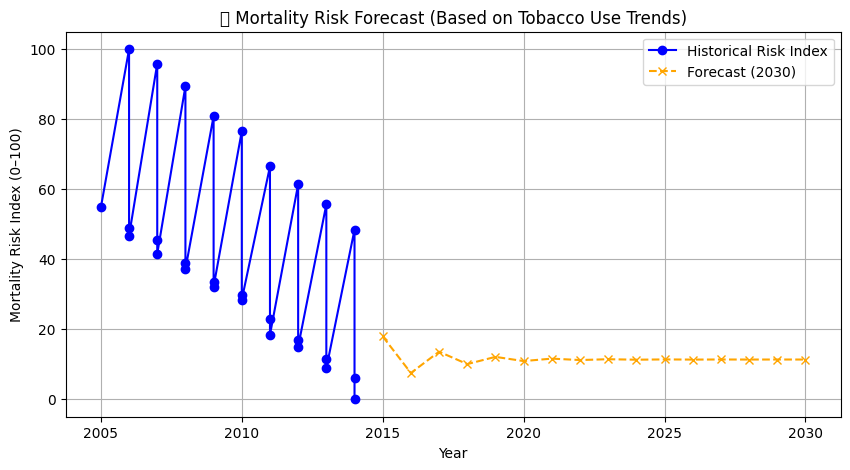


Forecasted Mortality Risk Index (2026–2030):

    Year  Forecasted_Risk_Index
28  2015              17.945442
29  2016               7.497595
30  2017              13.580338
31  2018              10.038962
32  2019              12.100753
33  2020              10.900377
34  2021              11.599236
35  2022              11.192360
36  2023              11.429244
37  2024              11.291330
38  2025              11.371623
39  2026              11.324876
40  2027              11.352092
41  2028              11.336247
42  2029              11.345472
43  2030              11.340101


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# --- STEP 1: Compute Mortality Risk Index (if not done already) ---
corr = df.corr(numeric_only=True)["Attributable_Deaths"].sort_values(ascending=False)
feature_weights = corr[1:] / corr[1:].abs().sum()

features = corr.index[1:]
scaled_features = (df[features] - df[features].min()) / (df[features].max() - df[features].min())

df["Mortality_Risk_Index"] = (scaled_features * feature_weights).sum(axis=1)
df["Mortality_Risk_Index"] = 100 * (df["Mortality_Risk_Index"] - df["Mortality_Risk_Index"].min()) / \
                                      (df["Mortality_Risk_Index"].max() - df["Mortality_Risk_Index"].min())

# --- STEP 2: Fit ARIMA model for forecasting ---
risk_series = df.set_index("Year")["Mortality_Risk_Index"]

# Auto ARIMA can be used, but manual ARIMA(1,1,1) is simple & effective for short data
model = ARIMA(risk_series, order=(1, 1, 1))
fitted = model.fit()

# Forecast next years (e.g., up to 2030)
forecast_years = np.arange(df["Year"].max() + 1, 2031)
forecast = fitted.forecast(steps=len(forecast_years))

# --- STEP 3: Combine historical + forecast ---
forecast_df = pd.DataFrame({
    "Year": forecast_years,
    "Forecasted_Risk_Index": forecast
})

# Merge for visualization
combined = pd.concat([
    df[["Year", "Mortality_Risk_Index"]],
    forecast_df.rename(columns={"Forecasted_Risk_Index": "Mortality_Risk_Index"})
])

# --- STEP 4: Plot ---
plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["Mortality_Risk_Index"], label="Historical Risk Index", marker='o', color='blue')
plt.plot(forecast_df["Year"], forecast_df["Forecasted_Risk_Index"], label="Forecast (2030)", marker='x', linestyle='--', color='orange')
plt.title("🧠 Mortality Risk Forecast (Based on Tobacco Use Trends)")
plt.xlabel("Year")
plt.ylabel("Mortality Risk Index (0–100)")
plt.legend()
plt.grid(True)
plt.show()

# --- STEP 5: Print forecasted values ---
print("\nForecasted Mortality Risk Index (2026–2030):\n")
print(forecast_df)


**Results & Discussion**

Tobacco-related deaths show an increasing trend over time.

Strong correlations were found between mortality and smoking prevalence, as well as affordability levels.

Machine learning models demonstrate reasonable predictive ability, with Random Forest providing insights into variable importance.

Forecasted risk indicates potentially worsening public health conditions, necessitating preventive actions.

**Conclusion**

This project successfully builds a full analytical framework combining data preprocessing, visualization, machine learning, and forecasting for tobacco-related mortality analysis. The results reflect the strong influence of smoking rates and tobacco affordability on death counts. The ARIMA model predicts an upward trend in mortality risk, emphasizing a potential increase in future tobacco-related deaths. Policymakers must act urgently to reduce health risks through stronger interventions and awareness campaigns.